<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Image__%EC%BB%A4%EC%8A%A4%ED%85%80_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_path = "dataset"

batch_size = 2
img_height = 180
img_width = 180

# path의 데이터를 ImageDataGenerator로 불러와주는 함수
def get_dataset(path, datagen):
    data_set = datagen.flow_from_directory(path,
                                           target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='categorical')
    return data_set

def main():
    # TODO: [지시사항 1번] 정규화 과정이 없는 ImageDataGenerator를 만드세요.
    first_gen = ImageDataGenerator()
    first_set = get_dataset(os.path.join(data_path, "val"), first_gen)
    x, y = first_set.__next__()

    print("\n1. 데이터 제너레이터 만들기")
    print("first_set")
    print("x: {}, y: {}".format(x.shape, y.shape))
    print(x[0][0][0]) # 픽셀이 0~255의 값을 가짐

    # TODO: [지시사항 2번] 픽셀값을 0~1의 값으로 정규화 하는 ImageDataGenerator를 만드세요.
    second_gen = ImageDataGenerator(rescale=1/255) # 255로 나눠줌
    second_set = get_dataset(os.path.join(data_path, "val"), second_gen)
    x, y = second_set.__next__()

    print("\n2. 데이터 제너레이터에 정규화 추가하기")
    print("second_set")
    print("x: {}, y: {}".format(x.shape, y.shape))
    print(x[0][0][0]) # 픽셀이 0~1의 값을 가지는 것을 확인하세요

    # TODO: [지시사항 3번] 실제 학습을 위한 ImageDataGenerator를 만드세요.
    # 학습 데이터를 위한 ImageDataGenerator를 만드세요.
    train_gen = ImageDataGenerator(rescale=1/255)

    # 학습 데이터셋을 불러오도록 경로명을 설정하세요.
    train_set = get_dataset(os.path.join(data_path, "train"), train_gen)

    # 검증 데이터를 위한 ImageDataGenerator를 만드세요.
    valid_gen = ImageDataGenerator(rescale=1/255)

    # 검증 데이터셋을 불러오도록 경로명을 설정하세요.
    valid_set = get_dataset(os.path.join(data_path, "val"), valid_gen)

    print("\n3. 실제 학습을 위한 데이터 제너레이터 작성")
    print("학습 데이터의 길이: ", len(train_set))
    print("검증 데이터의 길이: ", len(valid_set))

    return first_gen, second_gen, train_gen, train_set, valid_gen, valid_set

if __name__ == "__main__":
    main()


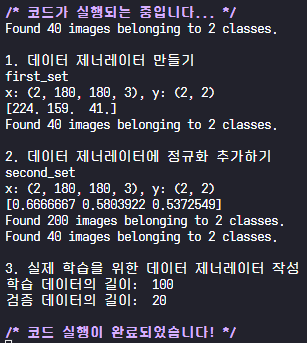